# STOCK PRICE ANALYSIS

In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def symbol_to_path(symbol, base_dir="datas"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'NIFTY50' not in symbols: 
        symbols.insert(0, 'NIFTY50')

    for symbol in symbols:
        if symbol == 'NIFTY50':
            df_temp=pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
            df_temp.rename(columns={'Close':symbol},inplace=True)
            df=df.join(df_temp,how='inner')
            
        else:
            df_temp=pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True, usecols=['Date', 'Close Price','Series'], na_values=['nan'])
            df_temp.rename(columns={'Close Price':symbol},inplace=True)
            df_temp=df_temp.query('Series == "EQ"')
            df_temp.drop(['Series'], axis=1,inplace=True)
            df=df.join(df_temp,how='inner')
            
    return df


    

## Stock Price Movement

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


             NIFTY50      RIL  MANAPPURAM   IDEA  DELTACORP
2019-09-30  11474.45  1332.25      141.20   6.15     168.90
2019-10-01  11359.90  1304.90      134.30   5.40     164.65
2019-10-03  11314.00  1311.05      133.45   5.10     154.10
2019-10-04  11174.75  1308.10      132.90   5.05     152.50
2019-10-07  11126.40  1310.10      132.70   5.15     157.30
...              ...      ...         ...    ...        ...
2020-08-26  11549.60  2137.30      158.00   8.90     115.55
2020-08-27  11559.25  2110.60      155.25   8.85     117.00
2020-08-28  11647.60  2116.15      156.65  10.10     116.65
2020-08-31  11387.50  2080.70      148.00  10.20     110.45
2020-09-01  11470.25  2087.25      153.20   8.85     109.80

[230 rows x 5 columns]


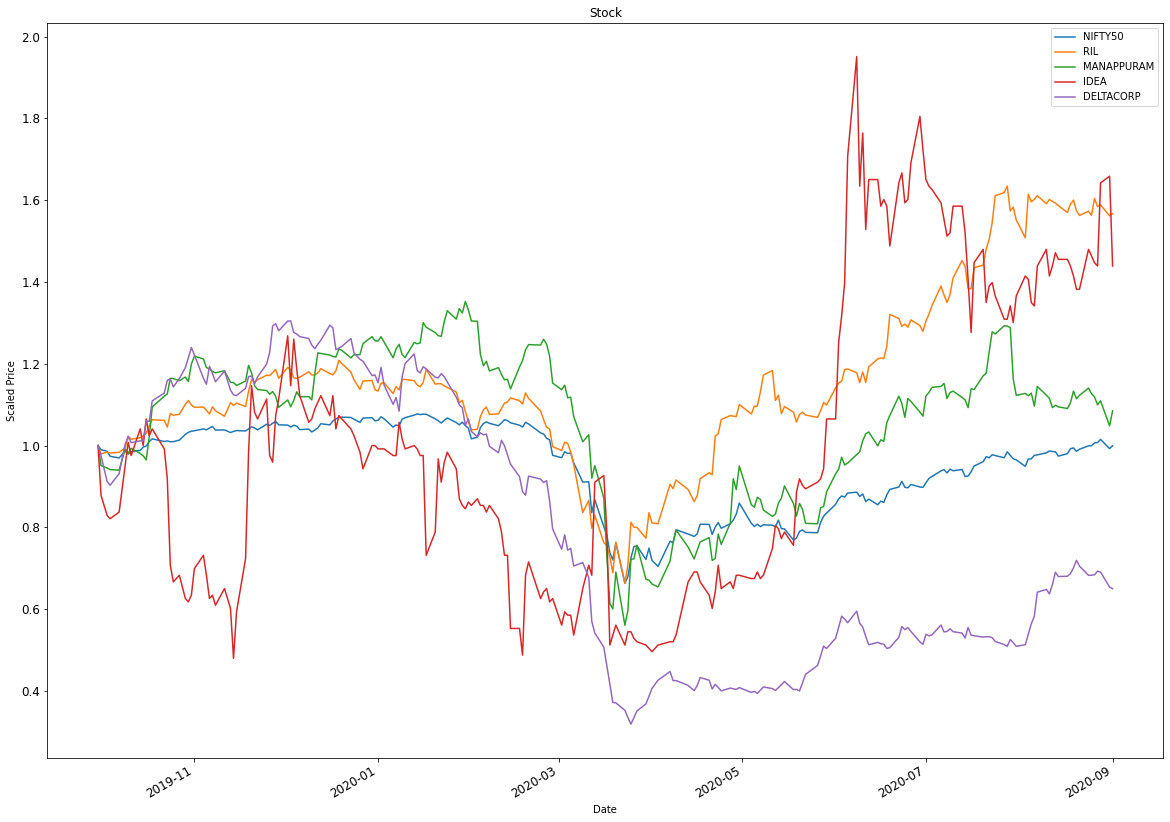

In [3]:
def normalize_data(df):
    df=df/df.iloc[0,:]
    return df


def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12, figsize=(20,15))
    ax.set_xlabel("Date")
    ax.set_ylabel("Scaled Price")
    plt.show()
    
def plot_selected(df, columns, start_index, end_index):
    df_plt=df.ix[start_index:end_index,columns]
    df_plt.plot()
    plt.show()
def test_run():
    # Define a date range
    dates = pd.date_range('2019-09-01', '2020-09-01')

    # Choose stock symbols to read
    symbols = ['RIL','MANAPPURAM','IDEA','DELTACORP']
    
    # Get stock data
    df = get_data(symbols, dates)
    print (df)
    
    df1=normalize_data(df)
    
    plot_data(df1, title="Stock")
    print('Mean')
    print(df.mean())
    print('Standard Deviation')
    print(df1.std())


if __name__ == "__main__":
    test_run()

## ROLLING MEAN

Mean
NIFTY50       10920.043913
RIL            1548.968478
MANAPPURAM      150.793043
IDEA              6.242391
DELTACORP       134.203261
dtype: float64
Standard Deviation
NIFTY50       0.106072
RIL           0.214421
MANAPPURAM    0.177787
IDEA          0.360512
DELTACORP     0.321586
dtype: float64
RIL    285.662798
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


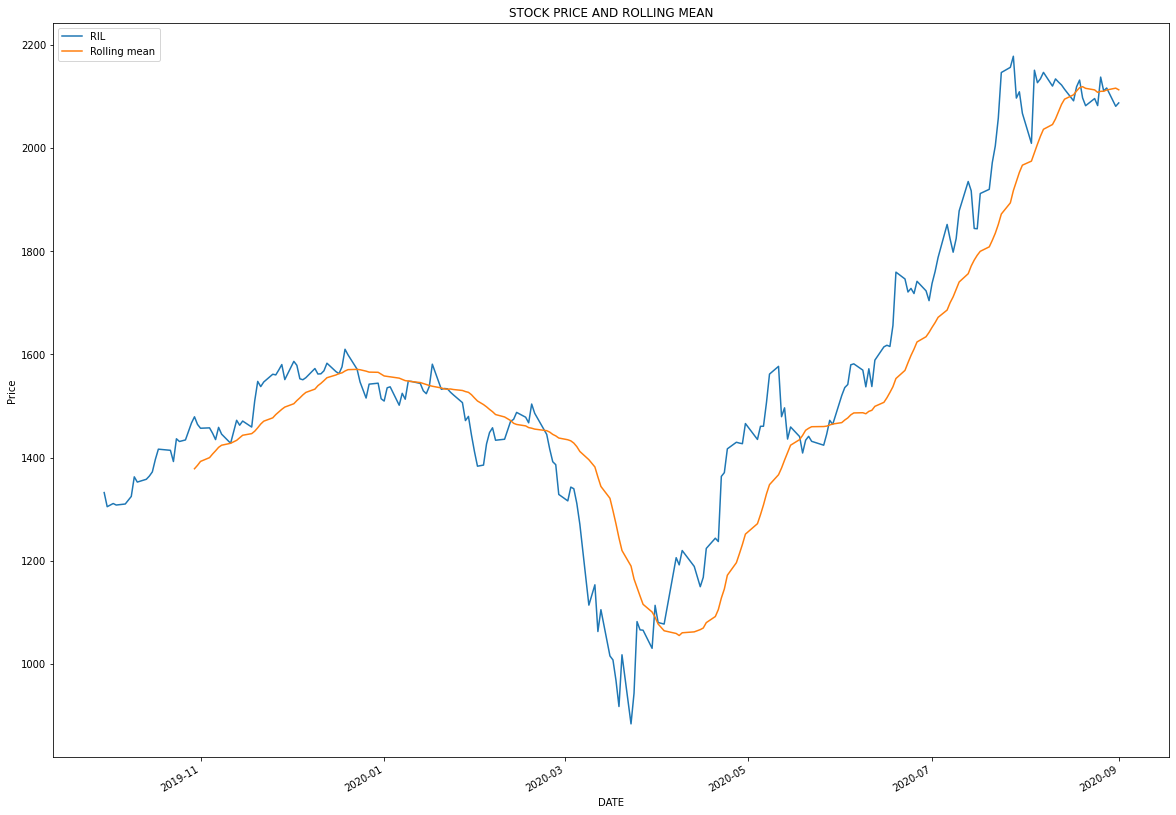

In [4]:
def test_run():
    # Define a date range
    dates = pd.date_range('2018-09-01', '2020-09-01')

    # Choose stock symbols to read
    symbols = ['RIL']
    
    # Get stock data
    df = get_data(symbols, dates)
    df.drop(columns='NIFTY50',inplace=True)
    print(df.std())
    ax=df.plot(label='DELTACORP',figsize=(20,15))
    df1=df.rolling(window=20).mean()
    df1.rename(columns={df.columns[0]:'Rolling mean'},inplace=True)
    df1.plot(label='Rolling mean',ax=ax)
    ax.legend(loc='upper left')
    ax.set_xlabel('DATE')
    ax.set_ylabel('Price')
    ax.set_title('STOCK PRICE AND ROLLING MEAN')
    
    plt.show()
    

if __name__ == "__main__":
    test_run()

## Bollinger Bands

In [5]:
def get_rolling_mean(values, window):
    return values.rolling(window).mean()
def get_rolling_std(values, window):
    return values.rolling(window).std()
def get_bollinger_bands(rm, rstd):
    upper_band=rm+2*(rstd)
    lower_band=rm-2*(rstd)
    return upper_band, lower_band

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


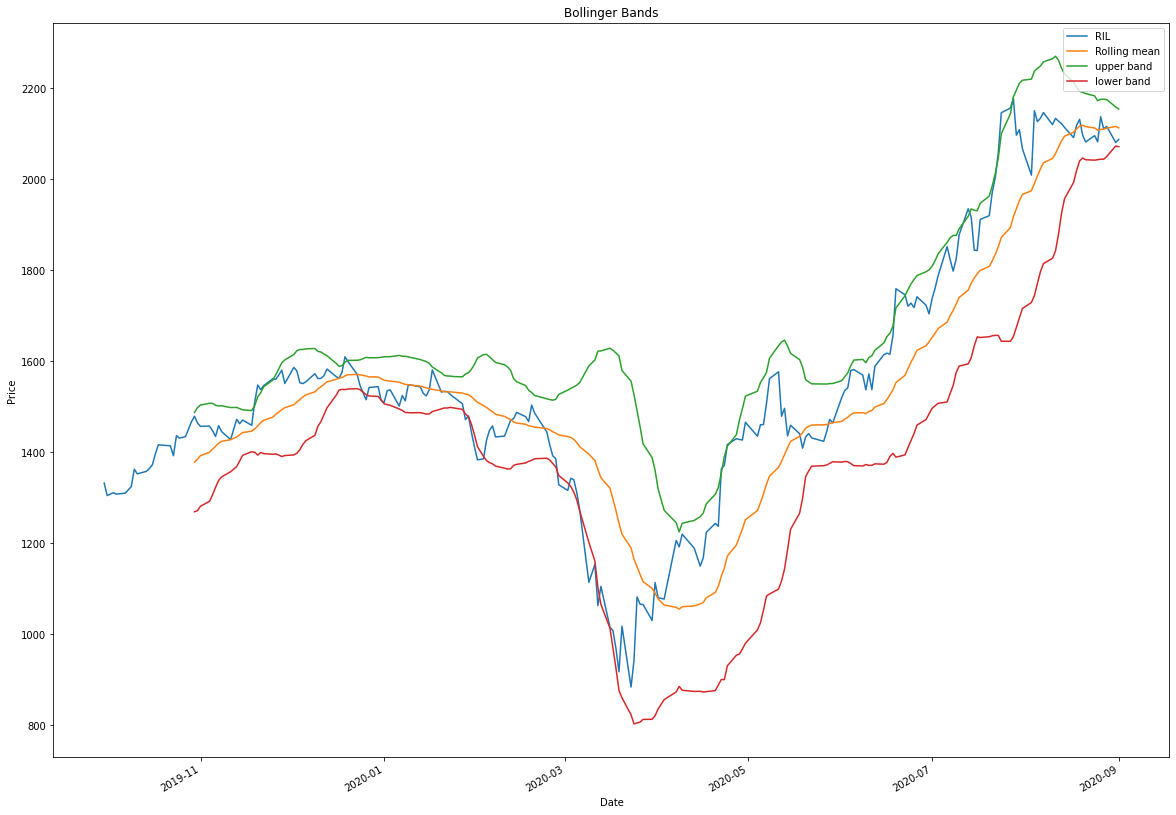

In [6]:
def test_run():
    dates = pd.date_range('2018-09-01', '2020-09-01')
    symbols = ['RIL']
    df = get_data(symbols, dates)
    rm = get_rolling_mean(df['RIL'], window=20)
    rstd = get_rolling_std(df['RIL'], window=20)
    upper,lower = get_bollinger_bands(rm, rstd)
    ax=df['RIL'].plot(title='Bollinger Bands',figsize=(20,15))
    rm.plot(label='Rolling mean', ax=ax)
    upper.plot(label='upper band', ax=ax)
    lower.plot(label='lower band', ax=ax)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper right')
    plt.show()


if __name__ == "__main__":
    test_run()


## Daily Return and Cumilative Return

In [143]:
def daily_returns(df):
    daily_returns=df.copy()
    daily_returns[1:]=(df[1:]/df[:-1].values)-1
    daily_returns.iloc[0,:]=0
    return daily_returns

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


             NIFTY50       RIL
2019-09-30  0.000000  0.000000
2019-10-01 -0.009983 -0.020529
2019-10-03 -0.004041  0.004713
2019-10-04 -0.012308 -0.002250
2019-10-07 -0.004327  0.001529
...              ...       ...
2020-08-26  0.006742  0.026512
2020-08-27  0.000836 -0.012492
2020-08-28  0.007643  0.002630
2020-08-31 -0.022331 -0.016752
2020-09-01  0.007267  0.003148

[230 rows x 2 columns]


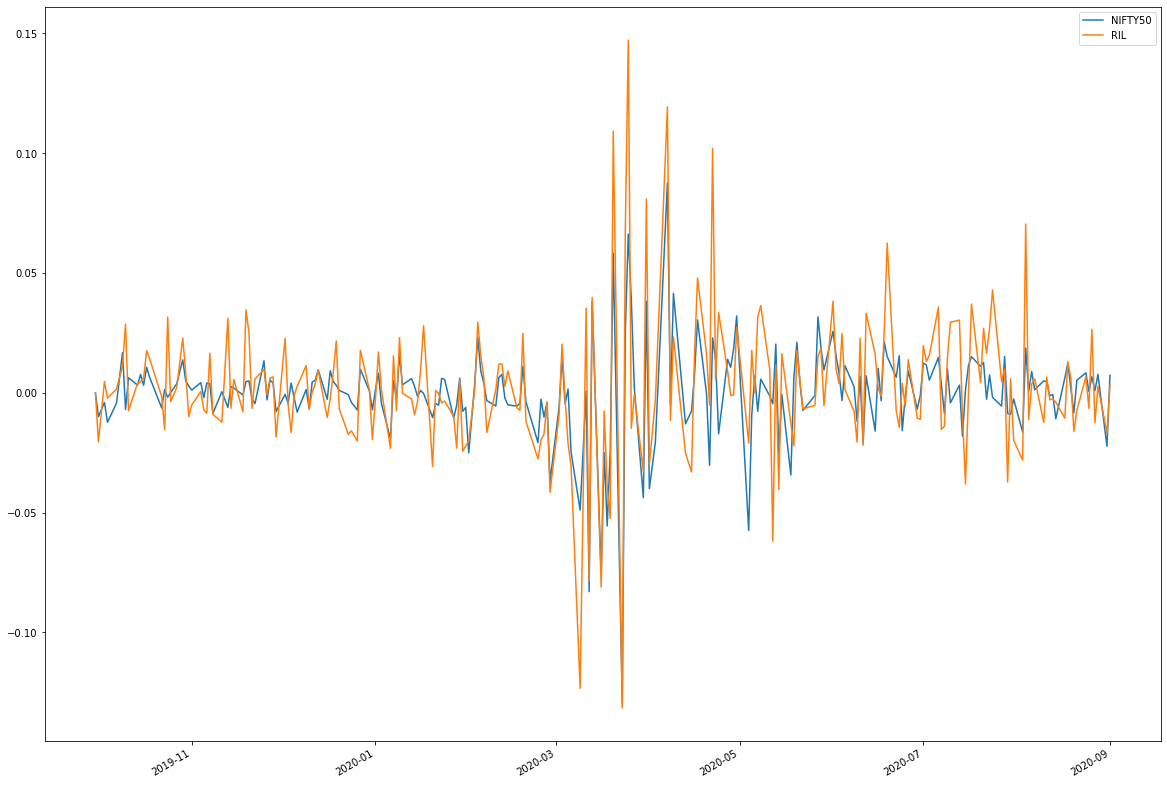

In [158]:
def test_run():
    dates = pd.date_range('2019-09-01', '2020-09-01')
    symbols = ['RIL']
    df = get_data(symbols, dates)
    x = daily_returns(df)
    print(x)
    x.plot(figsize=(20,15),label='Daily Returns')
    
if __name__ == "__main__":
    test_run()

In [162]:
def cumilative_returns(df,start_period,end_period):
    return ((df.loc[end_period]/df.loc[start_period].values)-1)*100

In [163]:
def test_run():
    dates = pd.date_range('2019-09-01', '2020-09-01')
    symbols = ['RIL']
    df = get_data(symbols, dates)
    start_period='2019-10-01'
    end_period='2020-09-01'
    x=cumilative_returns(df,start_period,end_period)
    print(x)
    
if __name__ == "__main__":
    test_run()

NIFTY50     0.971399
RIL        59.954786
Name: 2020-09-01 00:00:00, dtype: float64
